<a href="https://colab.research.google.com/github/g4aidl-upc-winter-2020/3D-Shape-classification/blob/main/Plot_Result_graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import pandas as pd

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
root='/content/drive/MyDrive/Proyecto/Plots/CSV_final'

In [31]:
#Experiments dictionary

#Put the value 1 in each experiment that you want to plot. The 4 .CSV files are needed tu plot every experiment

experiments = {"PointNet_InputScaling_BatchNorm_Scheduler_Dropout_WeightDecay"                : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "PointNet_InputScaling_BatchNorm_Scheduler_Dropout"                            : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "PointNet_InputScaling_BatchNorm_Scheduler"                                    : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "PointNet_InputScaling_BatchNorm"                                              : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "PointNet_InputScaling"                                                        : [ 0 , 0 , 201 , 50 , 100 , 0 , 1.5 ],
               "PointNet_BatchNorm"                                                           : [ 0 , 0 , 201 , 0 , 100 , 0 , 5 ],
               "PointNet"                                                                     : [ 1 , 0 , 110 , 75 , 100 , 0 , 0.8 ],
               "PointNet_NoInputScaling"                                                      : [ 1 , 0 , 201 , 0 , 100 , 0 , 5 ],

               "GCN_LR0.001 (avg pool)"                                                       : [ 0 , 0 , 201 , 40 , 100 , 0 , 1.5 ],
               "GCN_LR0.001 (max pool)"                                                       : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GCN_LR0.01 (avg pool)"                                                        : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GCN_LR0.01 (max pool)"                                                        : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GCN_Scheduler_initLR_0.01_DoubleCapacity (max pool)"                          : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GCN_Scheduler_initLR0.01 (max pool)"                                          : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],

               "GAT_InitLR0.001_1head"                                                        : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GAT_InitLR0.001_2heads (concat)"                                              : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GAT_InitLR0.001_4heads (concat)"                                              : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GAT_InitLR0.001_8heads (concat)"                                              : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GAT_InitLR0.01_1head"                                                         : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GAT_InitLR0.01_2heads (avg)"                                                  : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5],
               "GAT_InitLR0.01_2heads (concat)"                                               : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GAT_InitLR0.01_4heads (concat)"                                               : [ 0 , 0 , 201 , 0 , 100 , 0 , 5 ],
               "GAT_InitLR0.01_8heads (concat)"                                               : [ 0 , 0 , 201 , 0 , 100 , 0 , 3.5 ],
               "GAT_InitLR0.01_Dropout_2heads (concat)"                                       : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ],
               "GAT_InitLR0.01_Dropout_5e-4wd_2heads (concat)"                                : [ 0 , 0 , 201 , 55 , 100 , 0 , 1.5 ]
              }

In [32]:
def import_data(experiment_name):
  
  data_train_acc = pd.read_csv(root + "/run-" + experiment_name + "_train-tag-Acc.csv")
  data_train_acc = data_train_acc['Value']

  data_validation_acc = pd.read_csv(root + "/run-" + experiment_name + "_validation-tag-Acc.csv")
  data_validation_acc = data_validation_acc['Value']

  data_train_loss = pd.read_csv(root + "/run-" + experiment_name + "_train-tag-Loss.csv")
  data_train_loss = data_train_loss['Value']

  data_validation_loss = pd.read_csv(root + "/run-" + experiment_name + "_validation-tag-Loss.csv")
  data_validation_loss = data_validation_loss['Value']

  return data_train_acc, data_validation_acc, data_train_loss, data_validation_loss


In [33]:
import matplotlib.pyplot as plt

def plot_graphics(experiment_name, data_train_acc, data_validation_acc, data_train_loss, data_validation_loss , axis_limits):
  fig, (ax1, ax2) = plt.subplots(2, 1)

  t = range(1,201)
  fig.set_figheight(12)
  fig.set_figwidth(18)

  tr_acc_max='Train acc, Max = ' + "{:.2f}".format(max(data_train_acc)) + ' %'
  val_acc_max='Val acc, Max = ' + "{:.2f}".format(max(data_validation_acc)) + ' %'
 
  plot_name = experiment_name.replace("_"," ")

  fig.suptitle(plot_name, fontsize=30)
  
  ax1.plot(t, data_train_acc, label = tr_acc_max, lw="3") 
  ax1.plot(t, data_validation_acc, label = val_acc_max, lw="3")

  ax1.set_xlim(axis_limits[0], axis_limits[1])
  ax1.set_ylim(axis_limits[2], axis_limits[3])
  ax1.set_xlabel('Epoch',fontsize=15)
  ax1.set_ylabel('Accuracy',fontsize=20)
  ax1.legend(loc="lower right", ncol=1, shadow=True, fancybox=True,fontsize=15)
  ax1.tick_params(axis='both', labelsize=14)
  ax1.grid(True)

  ax2.plot(t, data_train_loss, label = 'Train loss', lw="3") 
  ax2.plot(t, data_validation_loss, label = 'Val loss', lw="3")

  ax2.set_xlim(axis_limits[0], axis_limits[1])
  ax2.set_ylim(axis_limits[4], axis_limits[5])
  ax2.set_xlabel('Epoch',fontsize=15)
  ax2.set_ylabel('Loss',fontsize=20)
  ax2.legend(loc="upper right", ncol=1, shadow=True, fancybox=True,fontsize=15)
  ax2.tick_params(axis='both', labelsize=14)
  ax2.grid(True)

  plt.savefig("/content/drive/MyDrive/Proyecto/Plots/" + plot_name + ".png")

  plt.show()

  return 

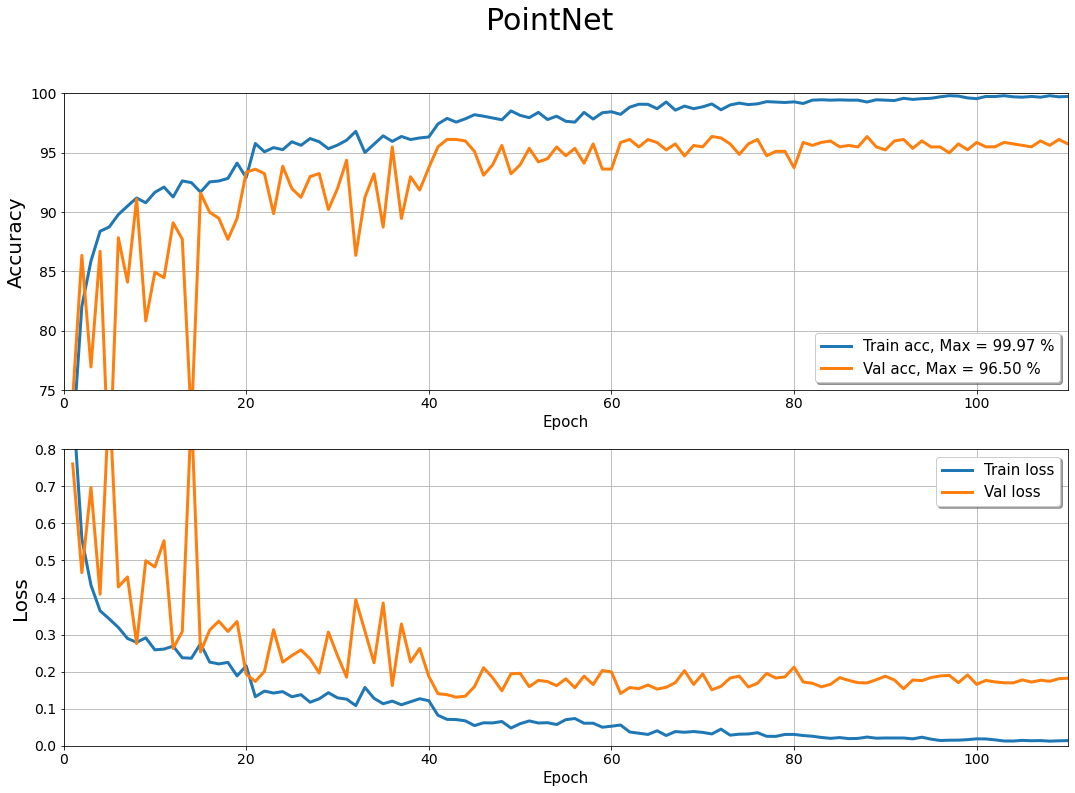

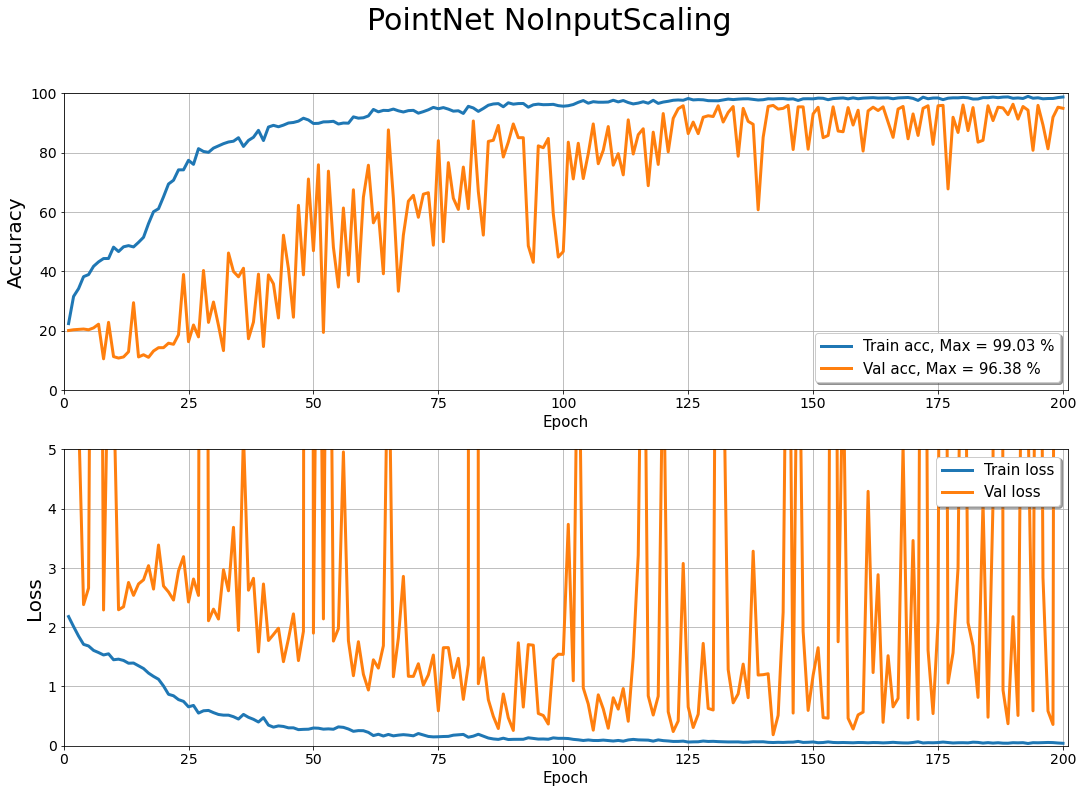

In [34]:
for name, value in experiments.items():
  if(value[0]==1):
    data_train_acc, data_validation_acc, data_train_loss, data_validation_loss = import_data(name)
    plot_graphics(name, data_train_acc, data_validation_acc, data_train_loss, data_validation_loss, value[1:])

In [24]:
def import_data2(experiment_name):
  
  data_train_acc = pd.read_csv(root + "/run-" + experiment_name + "_train-tag-Acc.csv")
  data_train_acc = data_train_acc['Value']

  data_validation_acc = pd.read_csv(root + "/run-" + experiment_name + "_validation-tag-Acc.csv")
  data_validation_acc = data_validation_acc['Value']

  data_train_loss = pd.read_csv(root + "/run-" + experiment_name + "_train-tag-Loss.csv")
  data_train_loss = data_train_loss['Value']

  data_validation_loss = pd.read_csv(root + "/run-" + experiment_name + "_validation-tag-Loss.csv")
  data_validation_loss = data_validation_loss['Value']

  return data_train_acc, data_validation_acc, data_train_loss, data_validation_loss

In [25]:
import matplotlib.pyplot as plt

def plot_graphics2(experimentList , axis_limits , plot_name):
  fig, (ax1, ax2) = plt.subplots(2, 1)

  t = range(1,201)
  fig.set_figheight(18)
  fig.set_figwidth(18)
  
  fig.suptitle(plot_name, fontsize=30)  

  for idx in range(len(experimentList)):
    tr_acc_max = experimentList[idx][4] +' Train acc, Max= ' + "{:.2f}".format(max(experimentList[idx][0])) + ' %'
    val_acc_max = experimentList[idx][4] + ' Val acc, Max= ' + "{:.2f}".format(max(experimentList[idx][1])) + ' %'
    tr_loss_max = experimentList[idx][4] +' Train loss'
    val_loss_max = experimentList[idx][4] + ' Val loss'    
    ax1.plot(t, experimentList[idx][0], label = tr_acc_max, lw="3") 
    ax1.plot(t, experimentList[idx][1], label = val_acc_max, lw="3")
    ax2.plot(t, experimentList[idx][2], label = tr_loss_max, lw="3") 
    ax2.plot(t, experimentList[idx][3], label = val_loss_max, lw="3")

  ax1.set_xlim(axis_limits[0], axis_limits[1])
  ax1.set_ylim(axis_limits[2], axis_limits[3])
  ax1.set_xlabel('Epoch',fontsize=15)
  ax1.set_ylabel('Accuracy',fontsize=20)
  ax1.legend(loc="lower right", ncol=1, shadow=True, fancybox=True,fontsize=12)
  ax1.tick_params(axis='both', labelsize=14)
  ax1.grid(True)

  ax2.set_xlim(axis_limits[0], axis_limits[1])
  ax2.set_ylim(axis_limits[4], axis_limits[5])
  ax2.set_xlabel('Epoch',fontsize=15)
  ax2.set_ylabel('Loss',fontsize=20)
  ax2.legend(loc="upper right", ncol=1, shadow=True, fancybox=True,fontsize=12)
  ax2.tick_params(axis='both', labelsize=14)
  ax2.grid(True)

  plt.savefig("/content/drive/MyDrive/Proyecto/Plots/" + plot_name + ".png")

  plt.show()

  return 

In [27]:
experiments2 = {"PointNet_InputScaling_BatchNorm_Scheduler_Dropout_WeightDecay"               : [0,'Pointnet'],
               "PointNet_InputScaling_BatchNorm_Scheduler_Dropout"                            : [0,'Test 1'],
               "PointNet_InputScaling_BatchNorm_Scheduler"                                    : [0,'Test 1'],
               "PointNet_InputScaling_BatchNorm"                                              : [0,'Test 1'],
               "PointNet_InputScaling"                                                        : [0,'Test 1'],
               "PointNet_BatchNorm"                                                           : [0,'Test 1'],
               "PointNet"                                                                     : [1,'PointNet'],
               "PointNet_NoInputScaling"                                                      : [1,'PointNet - No Input scaling'],

               "GCN_LR0.001 (avg pool)"                                                       : [0,'Test1a'],
               "GCN_LR0.001 (max pool)"                                                       : [0,'Test1b'],
               "GCN_LR0.01 (max pool)"                                                        : [0,'Baseline'],
               "GCN_Scheduler_initLR_0.01_DoubleCapacity (max pool)"                          : [0,'Test4=T3+DC'],
               "GCN_Scheduler_initLR0.01 (max pool)"                                          : [0,'Test3=T2+Sch'],
               "GCN_Scheduler_InitLR0.01_OneMoreLayer (max pool)"                             : [0,'Test4b=T3+Add.layer'],
               "GCN_Scheduler_InitLR0.01_OneMoreLayer_Dropout (max pool)"                     : [0,'Test 1'],
               "GCN_Scheduler_initLR_0.01_DoubleCapacity_RandomRotate (max pool)"             : [0,'GCN'],
               "GCN_Scheduler_initLR_0.01_DoubleCapacity_RandomFlip (max pool)"               : [0,'Test6=T4+RF'],
               "GCN_Scheduler_initLR_0.01_DoubleCapacity_Dropout (max pool)"                  : [0,'Test5=T4+DO'],

               "GAT_InitLR0.001_1head"                                                        : [0,'Test 1'],
               "GAT_InitLR0.001_2heads (concat)"                                              : [0,'Test 2'],
               "GAT_InitLR0.001_4heads (concat)"                                              : [0,'Baseline'],
               "GAT_InitLR0.001_8heads (concat)"                                              : [0,'Test3'],
               "GAT_InitLR0.01_1head"                                                         : [0,'Test 1'],
               "GAT_InitLR0.01_2heads (avg)"                                                  : [0,'Test 1'],
               "GAT_InitLR0.01_2heads (concat)"                                               : [0,'Test 1'],
               "GAT_InitLR0.01_4heads (concat)"                                               : [0,'Test 1a'],
               "GAT_InitLR0.01_8heads (concat)"                                               : [0,'Test 1'],
               "GAT_InitLR0.01_Dropout_2heads (concat)"                                       : [0,'Test 1'],
               "GAT_InitLR0.01_Dropout_5e-4wd_2heads (concat)"                                : [0,'Test 1'],
               "GAT_InitLR0.001_8heads_Dropout (concat)"                                      : [0,'Test5=T3+DO'],
               "GAT_InitLR0.001_8heads (avg)"                                                 : [0,'Test 4'],
               "GAT_InitLR0.001_8heads (avg only last layer)"                                 : [0,'Test 4b'],
               "GAT_InitLR0.001_8heads_RandomRotate (concat)"                                 : [0,'Test7=T3+RR'],
               "GAT_InitLR0.001_8heads_RandomFlip (concat)"                                   : [0,'GAT'],
              }


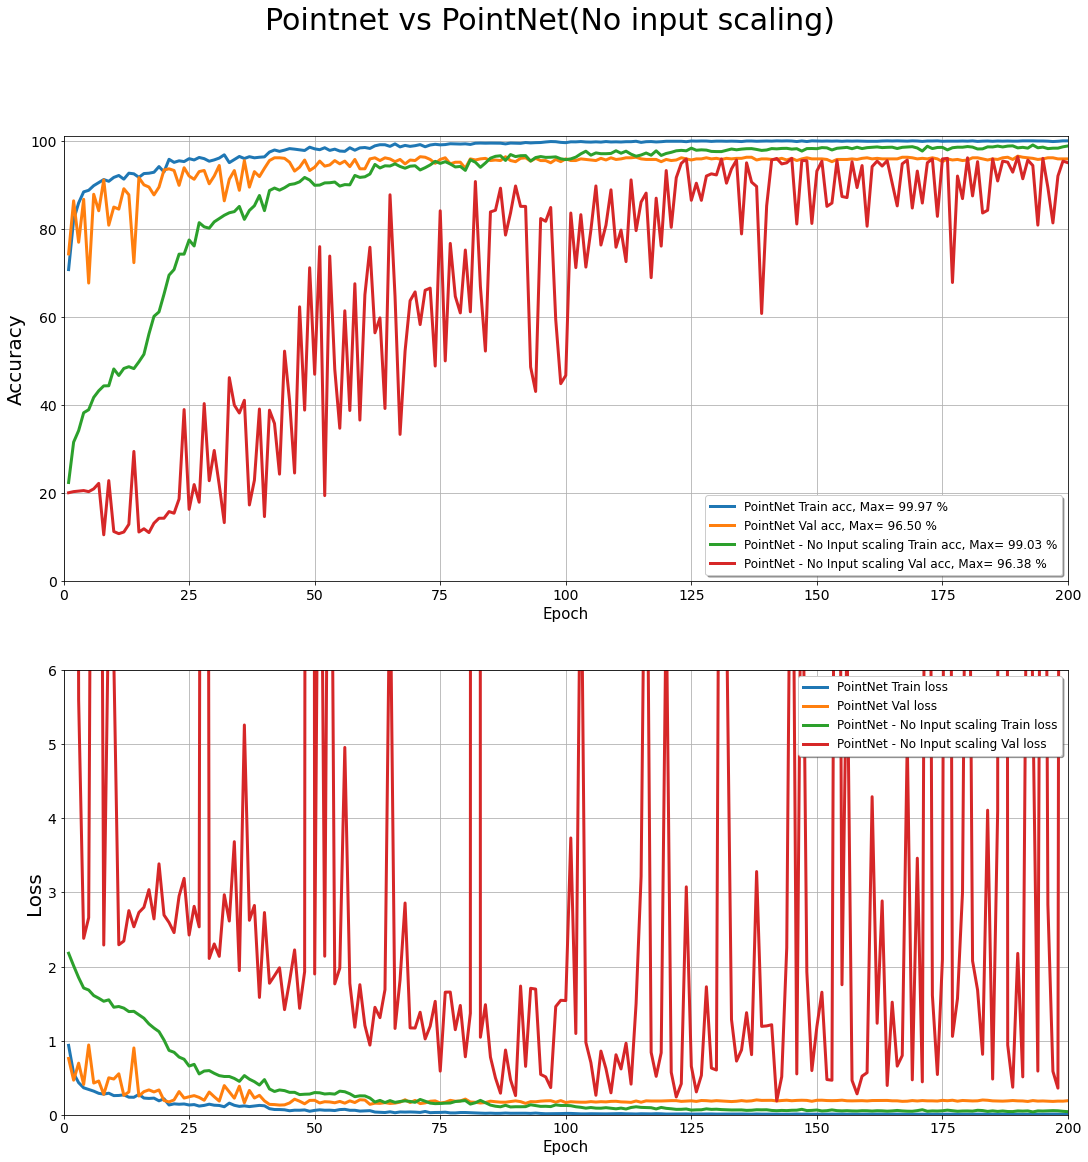

In [30]:
experimentList = []

axis_limits = [ 0 , 200 , 0 , 101 , 0 , 6 ]

name_exp = 'Pointnet vs PointNet(No input scaling)'

for name, value in experiments2.items():
  if(value[0]==1):
    
    data_train_acc, data_validation_acc, data_train_loss, data_validation_loss = import_data(name)
    experimentList.append( [ data_train_acc , data_validation_acc , data_train_loss , data_validation_loss , value[1] ] )

plot_graphics2(experimentList , axis_limits , name_exp)